Dataset Link: https://www.kaggle.com/datasets/kilanisikiru/maintenance-predictive-for-industrial-machines

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [8]:
df = pd.read_csv('MAINTENANCE PREDICTIVE FOR INDUSTRIAL MACHINES.csv')
df.head()

,Machine_ID,Machine_Type,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature
0,7,Sealing,6566.553173,74.883651,0.665550125,38.050919,209.748598,0,0.0,0,632.557007,35.390333
1,4,Packaging,3555.619002,72.927617,4.168719912,35.851286,428.760901,0,0.0,0,633.456781,39.443937
2,8,Sealing,9665.634684,88.630938,1.077148005,17.134947,494.769430,0,0.0,0,968.517304,27.108116
3,5,Filling,8036.032911,66.171745,2.156174596,48.747631,285.545612,0,0.0,0,845.114619,20.295214
4,7,Packaging,6341.134422,69.350498,2.647299241,24.161024,228.708278,0,0.0,1,266.119195,38.737649


## Histogram of Runtime Feature

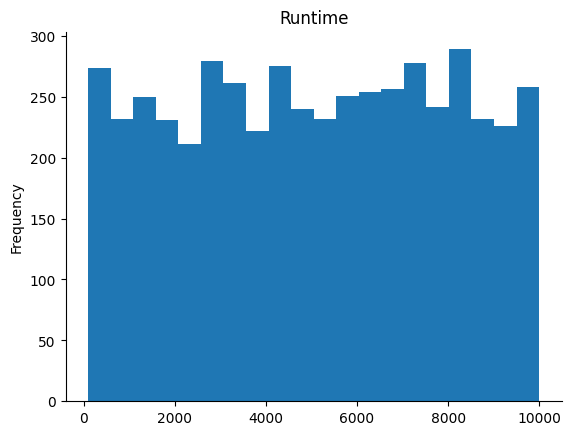

In [9]:
df.Runtime.plot(kind='hist', bins=20, title='Runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df.columns

Index(['Machine_ID', 'Machine_Type', 'Runtime', 'Temperature', 'Vibration',
       'Pressure', 'Power_Consumption', 'Maintenance_History', 'Downtime',
       'Failures', 'Remaining_Useful_Life', 'Ambient_Temperature'],
      dtype='object')

In [11]:
df.Machine_ID.unique()

array([ 7,  4,  8,  5, 10,  3,  6,  2,  1,  9])

## Dropping machine ID because it is only representing machine uniquely but not contributing in the model training

In [12]:
df.drop('Machine_ID',axis='columns',inplace=True)
df.head()

,Machine_Type,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature
0,Sealing,6566.553173,74.883651,0.665550125,38.050919,209.748598,0,0.0,0,632.557007,35.390333
1,Packaging,3555.619002,72.927617,4.168719912,35.851286,428.760901,0,0.0,0,633.456781,39.443937
2,Sealing,9665.634684,88.630938,1.077148005,17.134947,494.769430,0,0.0,0,968.517304,27.108116
3,Filling,8036.032911,66.171745,2.156174596,48.747631,285.545612,0,0.0,0,845.114619,20.295214
4,Packaging,6341.134422,69.350498,2.647299241,24.161024,228.708278,0,0.0,1,266.119195,38.737649


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Machine_Type           4999 non-null   object 
 1   Runtime                4993 non-null   float64
 2   Temperature            4996 non-null   float64
 3   Vibration              4999 non-null   object 
 4   Pressure               4994 non-null   float64
 5   Power_Consumption      4997 non-null   float64
 6   Maintenance_History    5000 non-null   int64  
 7   Downtime               5000 non-null   float64
 8   Failures               5000 non-null   int64  
 9   Remaining_Useful_Life  4993 non-null   float64
 10  Ambient_Temperature    5000 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 429.8+ KB


# Data Cleaning Process

In [14]:
df['Vibration'] = df.Vibration.apply(lambda x: float(x))
df.info()

In [15]:
df['Vibration'] = df['Vibration'].str.replace("'", "").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Machine_Type           4999 non-null   object 
 1   Runtime                4993 non-null   float64
 2   Temperature            4996 non-null   float64
 3   Vibration              4999 non-null   float64
 4   Pressure               4994 non-null   float64
 5   Power_Consumption      4997 non-null   float64
 6   Maintenance_History    5000 non-null   int64  
 7   Downtime               5000 non-null   float64
 8   Failures               5000 non-null   int64  
 9   Remaining_Useful_Life  4993 non-null   float64
 10  Ambient_Temperature    5000 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 429.8+ KB


In [16]:
df.Machine_Type.unique()

array(['Sealing', 'Packaging', 'Filling', nan], dtype=object)

In [17]:
machine_type=pd.get_dummies(df.Machine_Type,prefix='machine_type',dtype=int,drop_first=True)
df = pd.concat([df,machine_type],axis='columns')
df.head()

,Machine_Type,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
0,Sealing,6566.553173,74.883651,0.665550,38.050919,209.748598,0,0.0,0,632.557007,35.390333,0,1
1,Packaging,3555.619002,72.927617,4.168720,35.851286,428.760901,0,0.0,0,633.456781,39.443937,1,0
2,Sealing,9665.634684,88.630938,1.077148,17.134947,494.769430,0,0.0,0,968.517304,27.108116,0,1
3,Filling,8036.032911,66.171745,2.156175,48.747631,285.545612,0,0.0,0,845.114619,20.295214,0,0
4,Packaging,6341.134422,69.350498,2.647299,24.161024,228.708278,0,0.0,1,266.119195,38.737649,1,0


In [18]:
df.drop('Machine_Type',axis='columns',inplace=True)
df.head()

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
0,6566.553173,74.883651,0.665550,38.050919,209.748598,0,0.0,0,632.557007,35.390333,0,1
1,3555.619002,72.927617,4.168720,35.851286,428.760901,0,0.0,0,633.456781,39.443937,1,0
2,9665.634684,88.630938,1.077148,17.134947,494.769430,0,0.0,0,968.517304,27.108116,0,1
3,8036.032911,66.171745,2.156175,48.747631,285.545612,0,0.0,0,845.114619,20.295214,0,0
4,6341.134422,69.350498,2.647299,24.161024,228.708278,0,0.0,1,266.119195,38.737649,1,0


### Filling NA Values

In [19]:
df.isna().sum()

,0
Runtime,7
Temperature,4
Vibration,1
Pressure,6
Power_Consumption,3
Maintenance_History,0
Downtime,0
Failures,0
Remaining_Useful_Life,7
Ambient_Temperature,0


In [20]:
df.Runtime.describe()

,Runtime
count,4993.000000
mean,5071.623997
std,2857.775564
min,101.833433
25%,2642.018204
50%,5095.946454
75%,7521.034467
max,9997.438595


## I can use mean to fill na values in Runtime

In [21]:
mean_ = df.Runtime.mean()
mean_

5071.623997259924

In [22]:
df.Runtime.fillna(mean_,inplace=True)
df.isna().sum()

<ipython-input-22-a65cc25b3e4c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Runtime.fillna(mean_,inplace=True)


,0
Runtime,0
Temperature,4
Vibration,1
Pressure,6
Power_Consumption,3
Maintenance_History,0
Downtime,0
Failures,0
Remaining_Useful_Life,7
Ambient_Temperature,0


In [23]:
df.Temperature.describe()

,Temperature
count,4996.000000
mean,74.932340
std,8.557162
min,60.003559
25%,67.590948
50%,74.883282
75%,82.079847
max,89.996780


In [24]:
df.Temperature.fillna(74.93,inplace=True)
df.isna().sum()

<ipython-input-24-dc811cc77c8c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Temperature.fillna(74.93,inplace=True)


,0
Runtime,0
Temperature,0
Vibration,1
Pressure,6
Power_Consumption,3
Maintenance_History,0
Downtime,0
Failures,0
Remaining_Useful_Life,7
Ambient_Temperature,0


In [25]:
df.Vibration.describe()

,Vibration
count,4999.000000
mean,2.747249
std,1.303056
min,0.500042
25%,1.613454
50%,2.732837
75%,3.881815
max,4.998627


In [26]:
df.Vibration.fillna(2.7,inplace=True)
df.isna().sum()

<ipython-input-26-5c054bc423a8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Vibration.fillna(2.7,inplace=True)


,0
Runtime,0
Temperature,0
Vibration,0
Pressure,6
Power_Consumption,3
Maintenance_History,0
Downtime,0
Failures,0
Remaining_Useful_Life,7
Ambient_Temperature,0


In [27]:
df.Pressure.describe()

,Pressure
count,4994.000000
mean,32.642266
std,174.634102
min,-23.171479
25%,20.092369
50%,30.182803
75%,40.101740
max,12336.918820


In [28]:
df.Pressure.median()

30.18280328

In [29]:
df.Pressure.fillna(30.18,inplace=True)
df.isna().sum()

<ipython-input-29-fd793750c4d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Pressure.fillna(30.18,inplace=True)


,0
Runtime,0
Temperature,0
Vibration,0
Pressure,0
Power_Consumption,3
Maintenance_History,0
Downtime,0
Failures,0
Remaining_Useful_Life,7
Ambient_Temperature,0


In [30]:
df.Power_Consumption.describe()

,Power_Consumption
count,4997.000000
mean,301.498945
std,115.281191
min,-181.019431
25%,204.194371
50%,303.215397
75%,401.083765
max,499.989547


In [31]:
df.Power_Consumption.fillna(301.49,inplace=True)
df.isna().sum()

<ipython-input-31-14a9ad53d973>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Power_Consumption.fillna(301.49,inplace=True)


,0
Runtime,0
Temperature,0
Vibration,0
Pressure,0
Power_Consumption,0
Maintenance_History,0
Downtime,0
Failures,0
Remaining_Useful_Life,7
Ambient_Temperature,0


In [32]:
df.Remaining_Useful_Life.describe()

,Remaining_Useful_Life
count,4993.000000
mean,713.211892
std,960.941263
min,-969.746028
25%,585.553326
50%,726.802333
75%,866.395300
max,66899.373770


In [33]:
df.fillna(726.80,inplace=True)
df.isna().sum()

,0
Runtime,0
Temperature,0
Vibration,0
Pressure,0
Power_Consumption,0
Maintenance_History,0
Downtime,0
Failures,0
Remaining_Useful_Life,0
Ambient_Temperature,0


## Detecting and Removing Outliers

In [34]:
df.Runtime.describe()

,Runtime
count,5000.000000
mean,5071.623997
std,2855.774020
min,101.833433
25%,2643.079575
50%,5080.481996
75%,7519.695528
max,9997.438595


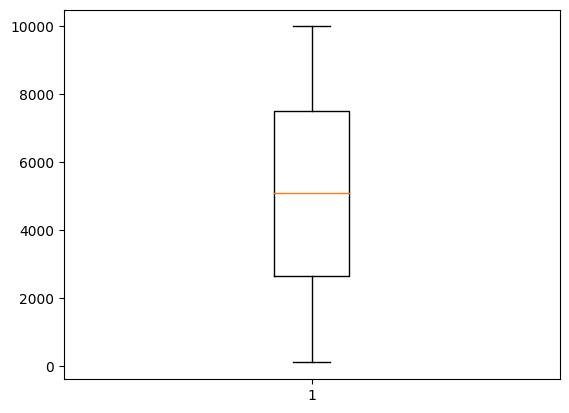

In [35]:
plt.boxplot(df.Runtime)
plt.show()

In [36]:
df.Temperature.describe()

,Temperature
count,5000.000000
mean,74.932338
std,8.553738
min,60.003559
25%,67.598328
50%,74.909451
75%,82.071430
max,89.996780


In [37]:
df.Vibration.describe()

,Vibration
count,5000.000000
mean,2.747239
std,1.302925
min,0.500042
25%,1.613866
50%,2.731185
75%,3.881799
max,4.998627


In [38]:
df.Pressure.describe()

,Pressure
count,5000.000000
mean,32.639311
std,174.529290
min,-23.171479
25%,20.104257
50%,30.180000
75%,40.072358
max,12336.918820


In [39]:
df[df.Pressure<0]

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
5,2999.959514,69.233783,2.44616,-23.171479,472.579271,1,7.262097,0,787.844933,35.064563,0,0


In [40]:
df=df[df.Pressure>0]
df[df.Pressure<0]

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing


In [41]:
percentile_99 = df.Pressure.quantile(0.99)
percentile_99

49.59372948739999

In [42]:
df[df.Pressure>50]

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
871,1170.876937,61.755037,2.200097,447.822315,458.115717,0,0.000000,0,962.179853,25.787468,0,0
872,9868.298281,77.649415,3.154289,12336.918820,218.204156,1,5.289988,0,897.899127,27.345734,0,1


In [43]:
df = df[df.Pressure<=50]
df.Pressure.describe()

,Pressure
count,4997.000000
mean,30.105060
std,11.572046
min,10.000821
25%,20.105933
50%,30.180000
75%,40.069675
max,49.995642


In [44]:
df.Power_Consumption.describe()

,Power_Consumption
count,4997.000000
mean,301.450029
std,115.228442
min,-181.019431
25%,204.194371
50%,303.050783
75%,400.786490
max,499.989547


In [45]:
df[df.Power_Consumption<0]

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
9,2641.137857,86.663603,0.732663,19.544970,-181.019431,0,0.0,0,751.551751,24.654174,0,0
870,8076.477446,87.238882,4.849802,15.539264,-165.800738,0,0.0,0,684.942368,36.602992,0,1


In [46]:
df = df[df.Power_Consumption>0]
df[df.Power_Consumption<0]

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Downtime,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing


In [47]:
df.Power_Consumption.describe()

,Power_Consumption
count,4995.000000
mean,301.640164
std,114.858812
min,100.058307
25%,204.278688
50%,303.109653
75%,400.890457
max,499.989547


In [48]:
df.Maintenance_History.describe()

,Maintenance_History
count,4995.000000
mean,0.195596
std,0.396698
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [49]:
df.Maintenance_History.unique()

array([0, 1])

In [50]:
df.Downtime.describe()

,Downtime
count,4995.000000
mean,1.048160
std,2.417426
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.982072


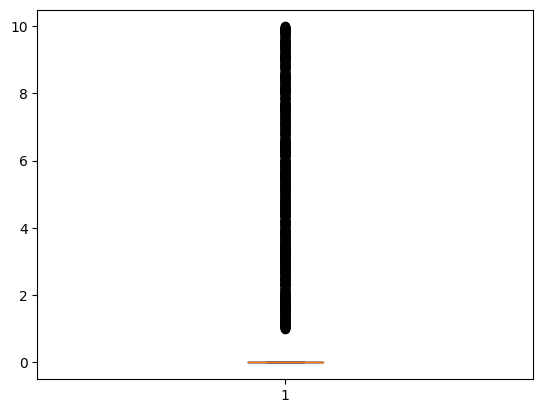

In [51]:
plt.boxplot(df.Downtime)
plt.show()

In [52]:
df.drop('Downtime',axis='columns',inplace=True)
df.head()

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
0,6566.553173,74.883651,0.665550,38.050919,209.748598,0,0,632.557007,35.390333,0,1
1,3555.619002,72.927617,4.168720,35.851286,428.760901,0,0,633.456781,39.443937,1,0
2,9665.634684,88.630938,1.077148,17.134947,494.769430,0,0,968.517304,27.108116,0,1
3,8036.032911,66.171745,2.156175,48.747631,285.545612,0,0,845.114619,20.295214,0,0
4,6341.134422,69.350498,2.647299,24.161024,228.708278,0,1,266.119195,38.737649,1,0


In [53]:
df.Failures.unique()

array([0, 1])

In [54]:
df.Remaining_Useful_Life.describe()

,Remaining_Useful_Life
count,4995.000000
mean,713.127159
std,960.738124
min,-969.746028
25%,585.619517
50%,726.800000
75%,865.800991
max,66899.373770


In [55]:
df[df.Remaining_Useful_Life<0]

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
11,5071.623997,72.686103,2.086372,25.766247,365.937060,0,0,-580.334574,23.141329,1,0
12,5071.623997,80.084422,4.503761,28.342339,284.073540,0,0,-969.746028,38.456141,0,1
555,2575.816442,80.112087,2.608323,17.345754,412.713744,0,0,-510.761158,21.615426,0,1


In [56]:
df = df[df.Remaining_Useful_Life>0]
df[df.Remaining_Useful_Life<0]

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing


In [57]:
percentile_99 = df.Remaining_Useful_Life.quantile(0.99)
percentile_99

993.389239115

In [58]:
df[df.Remaining_Useful_Life>1000]


,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
13,5071.623997,60.51455,2.277755,35.856882,207.979854,0,0,66899.37377,24.306395,1,0


In [59]:
df = df[df.Remaining_Useful_Life<1000]
df[df.Remaining_Useful_Life>1000]

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing


In [60]:
df.Ambient_Temperature.describe()

,Ambient_Temperature
count,4991.000000
mean,30.043783
std,5.772502
min,20.000951
25%,25.109319
50%,29.985884
75%,35.050706
max,39.997901


In [61]:
df.describe()

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
count,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000,4991.000000
mean,5072.244550,74.932028,2.747212,30.112721,301.627312,0.195752,0.102184,700.707599,30.043783,0.344019,0.325987
std,2856.114901,8.552445,1.303116,11.574311,114.882553,0.396818,0.302920,210.999398,5.772502,0.475095,0.468789
min,101.833433,60.003559,0.500042,10.000821,100.058307,0.000000,0.000000,0.064476,20.000951,0.000000,0.000000
25%,2643.753230,67.595974,1.612400,20.114662,204.207829,0.000000,0.000000,585.742704,25.109319,0.000000,0.000000
50%,5093.804986,74.901184,2.733337,30.180000,303.109653,0.000000,0.000000,726.800000,29.985884,0.000000,0.000000
75%,7519.867856,82.074230,3.881815,40.073378,400.890457,0.000000,0.000000,865.800991,35.050706,1.000000,1.000000
max,9997.438595,89.996780,4.998627,49.995642,499.989547,1.000000,1.000000,999.766411,39.997901,1.000000,1.000000


## Useful charts for insights

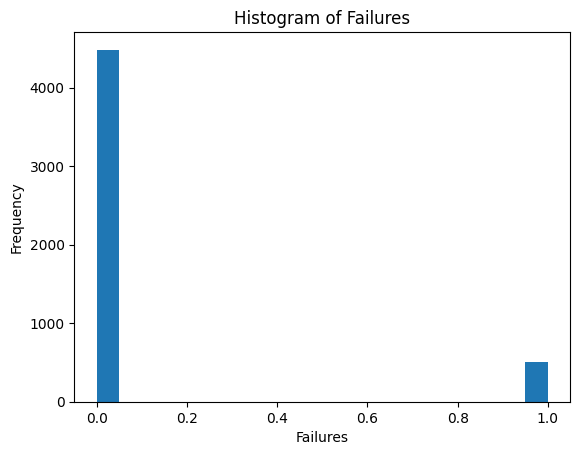

In [62]:
plt.hist(df.Failures, bins=20)
plt.title('Histogram of Failures')
plt.xlabel('Failures')
plt.ylabel('Frequency')
plt.show()

#### This chart is showing there is imbalance in the data

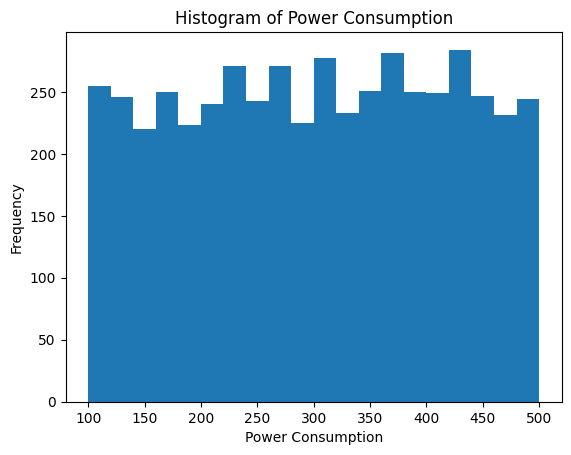

In [63]:
plt.hist(df.Power_Consumption, bins=20)
plt.title('Histogram of Power Consumption')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

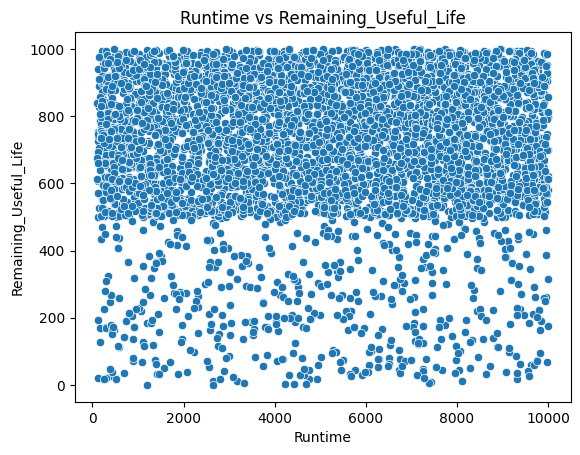

In [82]:
sns.scatterplot(x='Runtime', y='Remaining_Useful_Life', data=df)
plt.title('Runtime vs Remaining_Useful_Life')
plt.xlabel('Runtime')
plt.ylabel('Remaining_Useful_Life')
plt.show()

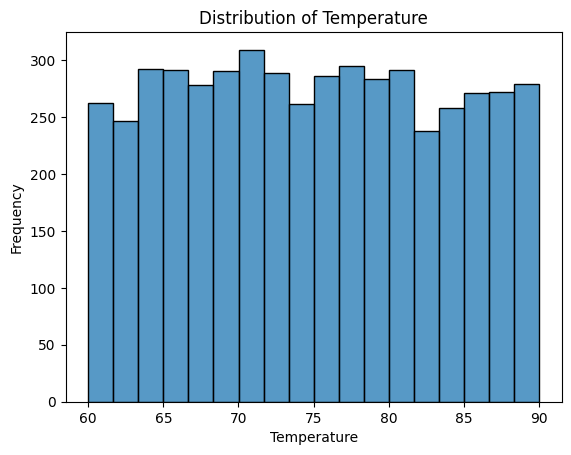

In [84]:
sns.histplot(x='Temperature', data=df)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

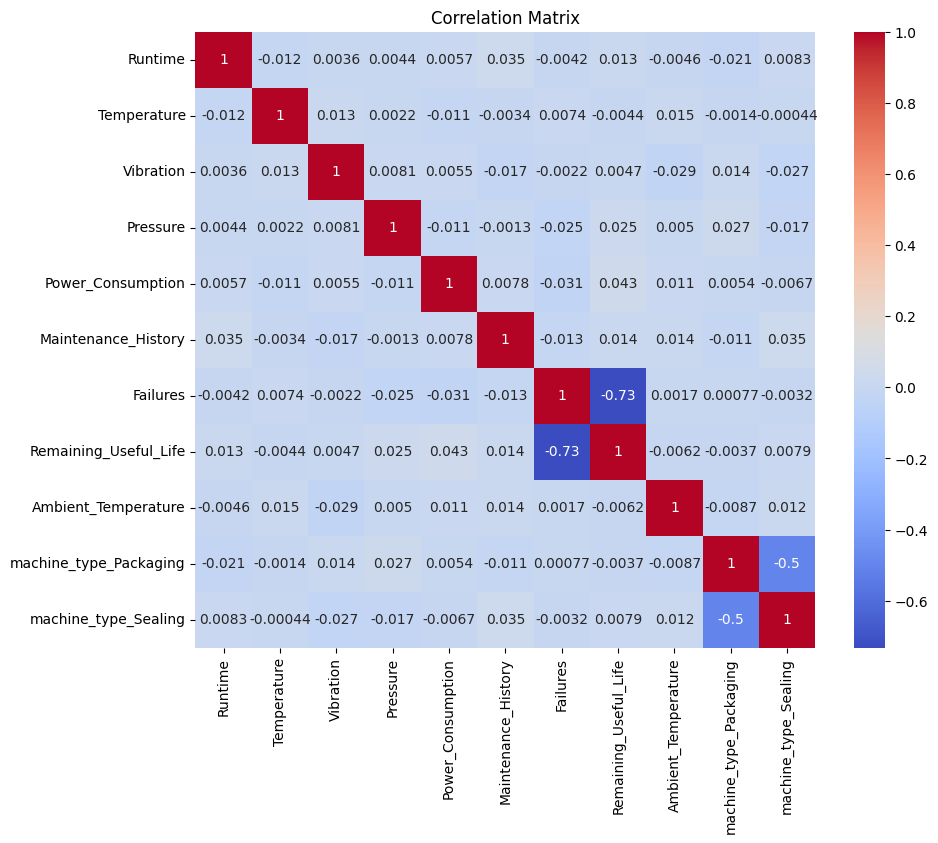

In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [64]:
df.head()

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Failures,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
0,6566.553173,74.883651,0.665550,38.050919,209.748598,0,0,632.557007,35.390333,0,1
1,3555.619002,72.927617,4.168720,35.851286,428.760901,0,0,633.456781,39.443937,1,0
2,9665.634684,88.630938,1.077148,17.134947,494.769430,0,0,968.517304,27.108116,0,1
3,8036.032911,66.171745,2.156175,48.747631,285.545612,0,0,845.114619,20.295214,0,0
4,6341.134422,69.350498,2.647299,24.161024,228.708278,0,1,266.119195,38.737649,1,0


## Model Training

#### Seperating target feature

In [65]:
x = df.drop('Failures',axis='columns')
y = df.Failures
x.head()

,Runtime,Temperature,Vibration,Pressure,Power_Consumption,Maintenance_History,Remaining_Useful_Life,Ambient_Temperature,machine_type_Packaging,machine_type_Sealing
0,6566.553173,74.883651,0.665550,38.050919,209.748598,0,632.557007,35.390333,0,1
1,3555.619002,72.927617,4.168720,35.851286,428.760901,0,633.456781,39.443937,1,0
2,9665.634684,88.630938,1.077148,17.134947,494.769430,0,968.517304,27.108116,0,1
3,8036.032911,66.171745,2.156175,48.747631,285.545612,0,845.114619,20.295214,0,0
4,6341.134422,69.350498,2.647299,24.161024,228.708278,0,266.119195,38.737649,1,0


### splitting the data into train and test

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
x_train.shape,x_test.shape

((3992, 10), (999, 10))

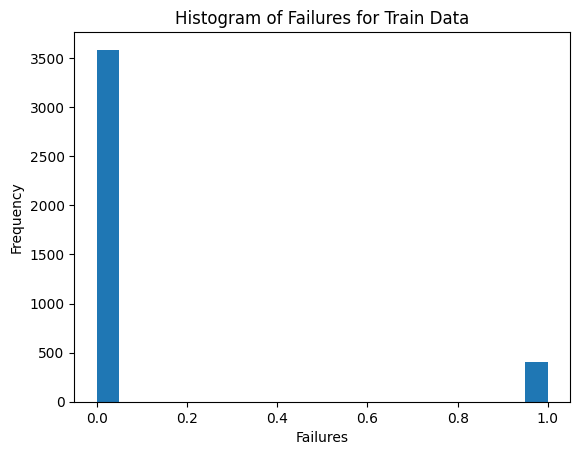

In [67]:
plt.hist(y_train, bins=20)
plt.title('Histogram of Failures for Train Data')
plt.xlabel('Failures')
plt.ylabel('Frequency')

plt.show()

## Balancing the data using SMOTE technique
Synthetic Minority Over-sampling Technique

In [68]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

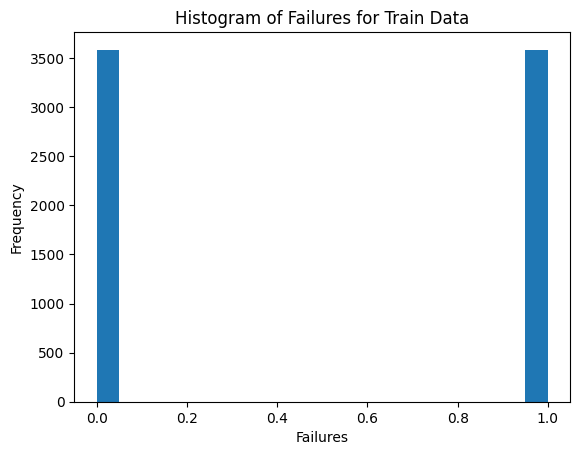

In [69]:
plt.hist(y_train, bins=20)
plt.title('Histogram of Failures for Train Data')
plt.xlabel('Failures')
plt.ylabel('Frequency')
plt.show()

## Scalling the data

In [70]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

In [71]:
x_train_scalled = scaler_x.fit_transform(x_train)
x_test_scalled = scaler_x.transform(x_test)
y_train_scalled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scalled = scaler_y.transform(y_test.values.reshape(-1,1))

In [72]:
x_train_scalled[:5]

array([[0.92405222, 0.30596574, 0.25138046, 0.32384305, 0.70430611,
        0.        , 0.9609226 , 0.15691433, 1.        , 0.        ],
       [0.30538314, 0.15921343, 0.7104677 , 0.04864663, 0.99557164,
        0.        , 0.70370669, 0.2889474 , 0.        , 1.        ],
       [0.19173604, 0.38799665, 0.36343782, 0.59683357, 0.70979362,
        0.        , 0.95416553, 0.44242942, 0.        , 0.        ],
       [0.9467375 , 0.03946123, 0.17319373, 0.37047273, 0.26777358,
        0.        , 0.96665339, 0.42981985, 1.        , 0.        ],
       [0.55506688, 0.52521829, 0.97775344, 0.87005532, 0.50091582,
        0.        , 0.58378998, 0.5985223 , 0.        , 1.        ]])

## Model Selection

In [73]:
model_selection = {
    'logistic_regression':{
        'model': LogisticRegression(max_iter=5000),
        'params': {
            'tol': [0.0001, 0.001,0.01],
            'C': [1, 10, 100]

        }
    },
    'svc':{
        'model': SVC(),
        'params': {
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1, 10, 100],
            }
    },
    'random_forest_classifier':{
        'model': RandomForestClassifier(),
        'params':{
            'criterion':["gini", "entropy", "log_loss"],
            'n_estimators':[10,50,100],
        }
    },
    'decision_tree_classifier':{
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':["gini", "entropy", "log_loss"]
        }
    }
}

In [74]:
scores = []
for name, model in model_selection.items():
  m = GridSearchCV(model['model'], model['params'], cv=5)
  m.fit(x_train_scalled, y_train_scalled.ravel()),
  scores.append({
      'model':name,
      'best_score': m.best_score_,
      'best_params':m.best_params_
  })

pd.DataFrame(scores)

,model,best_score,best_params
0,logistic_regression,0.998187,"{'C': 100, 'tol': 0.0001}"
1,svc,0.998326,"{'C': 100, 'kernel': 'linear'}"
2,random_forest_classifier,0.999721,"{'criterion': 'gini', 'n_estimators': 10}"
3,decision_tree_classifier,0.999721,{'criterion': 'gini'}


## All the models are giving almost same accuracy so we can use any of them

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(), x_train_scalled, y_train_scalled.ravel(), cv=5)
scores.mean()

0.9892593490166538

In [76]:
model = LogisticRegression(C=100,tol=0.0001)
model.fit(x_train_scalled,y_train_scalled.ravel())
model.score(x_test_scalled,y_test_scalled)

0.997997997997998

In [77]:
y_pred = model.predict(x_test_scalled)
y_pred[:5]

array([0., 0., 0., 0., 0.])

In [78]:
print(classification_report(y_test_scalled, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       897
         1.0       1.00      0.98      0.99       102

    accuracy                           1.00       999
   macro avg       1.00      0.99      0.99       999
weighted avg       1.00      1.00      1.00       999



In [79]:
cm = confusion_matrix(y_test_scalled, y_pred)
cm

array([[897,   0],
       [  2, 100]])

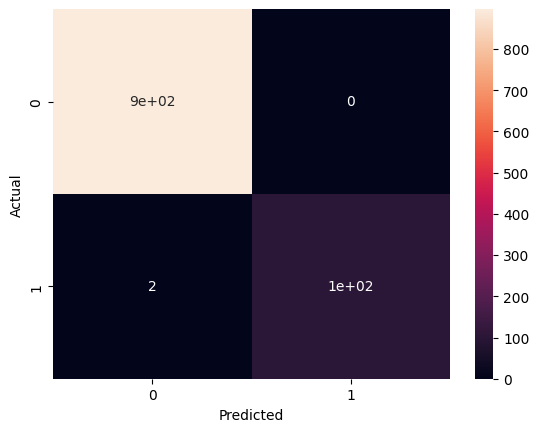

In [80]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()